In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
%matplotlib inline

import warnings


In [ ]:
train_df=pd.read_csv('/content/train.csv', index_col='PassengerId')
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Of all passengers in train_df, how many survived, how many died ?**

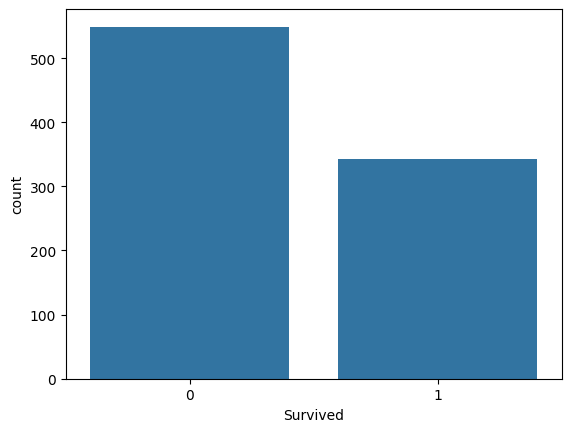

In [ ]:
sns.countplot(x='Survived', data=train_df);


In [ ]:
print(train_df.Survived.sum()/train_df.Survived.count())


0.3838383838383838


more people died than survived (%38 survived)



**Sex: Survival rates are higher for females compared to males**

In [ ]:
train_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

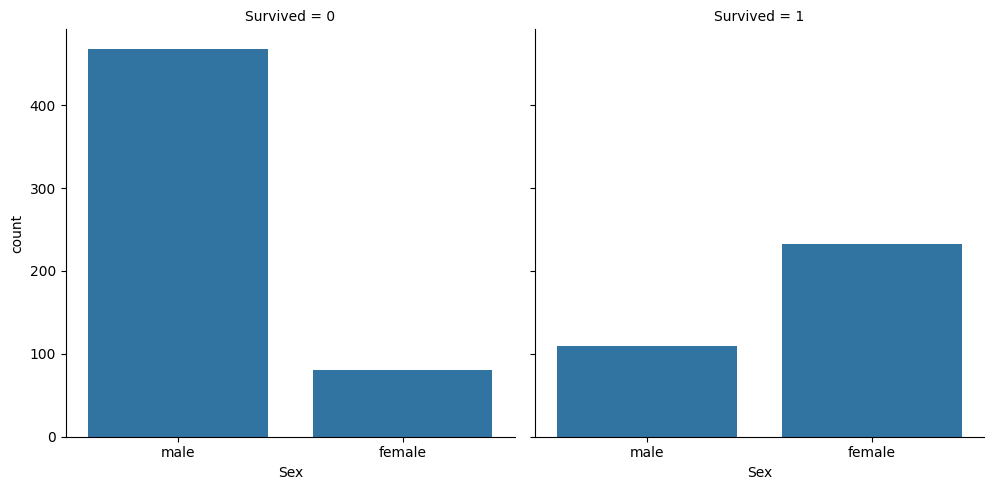

In [ ]:
sns.catplot(x='Sex', col='Survived', kind='count', data=train_df);


# **Droping irrelevant features**

In [ ]:
train_df=train_df.drop(['Name'],axis=1)
train_df=train_df.drop(['Ticket'],axis=1)
train_df=train_df.drop('Cabin', axis=1)

In this area, we select our features. Here is our features.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


But as you see there is some missing variables. So we need to handle these.

# **Handle missing values**

In [ ]:
from sklearn.impute import SimpleImputer

numirical_imputer=SimpleImputer(strategy='median')            #Filling the null  numerical values with strategy of median
categorical_imputer=SimpleImputer(strategy='most_frequent')   #Filling the null  categorical values with strategy of most frequent
train_df[['Age','Parch']]=numirical_imputer.fit_transform(train_df[['Age','Parch']])
train_df[['Embarked','Sex','Fare']]=categorical_imputer.fit_transform(train_df[['Embarked','Sex','Fare']])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    object 
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [ ]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0.0,7.25,S
2,1,1,female,38.0,1,0.0,71.2833,C
3,1,3,female,26.0,0,0.0,7.925,S
4,1,1,female,35.0,1,0.0,53.1,S
5,0,3,male,35.0,0,0.0,8.05,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0.0,13.0,S
888,1,1,female,19.0,0,0.0,30.0,S
889,0,3,female,28.0,1,2.0,23.45,S


<ipython-input-41-847447081300>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True)


<Axes: >

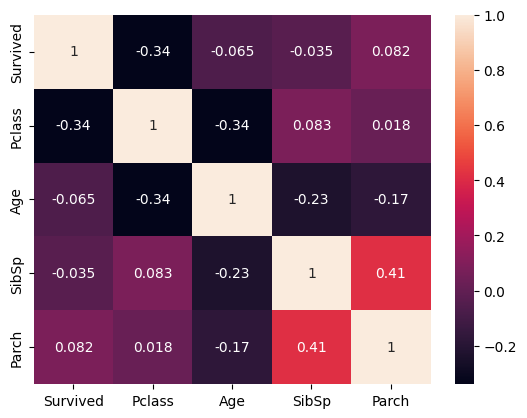

In [ ]:
sns.heatmap(train_df.corr(),annot=True)

In [ ]:
#We split our x and y (y is our result and it says survived or not)

x=train_df.drop('Survived',axis=1)
y=train_df['Survived']

# **Encode variables**

In [ ]:
# We have 2 feature which needs encode; Sex and Embarked

other_col = ['Pclass','Age','Fare','Parch','SibSp']
x1 = pd.get_dummies(x[['Sex','Embarked']])
x = pd.concat([x[other_col], x1], axis = 1)
x

,Pclass,Age,Fare,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,7.25,0.0,1,0,1,0,0,1
2,1,38.0,71.2833,0.0,1,1,0,1,0,0
3,3,26.0,7.925,0.0,0,1,0,0,0,1
4,1,35.0,53.1,0.0,1,1,0,0,0,1
5,3,35.0,8.05,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,13.0,0.0,0,0,1,0,0,1
888,1,19.0,30.0,0.0,0,1,0,0,0,1
889,3,28.0,23.45,2.0,1,1,0,0,0,1


In [ ]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

# **Scale the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col_to_standard=['Age','Fare']
x[col_to_standard]=scaler.fit_transform(x[col_to_standard])

x=pd.get_dummies(x)
x

,Pclass,Age,Fare,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,-0.565736,-0.502445,0.0,1,0,1,0,0,1
2,1,0.663861,0.786845,0.0,1,1,0,1,0,0
3,3,-0.258337,-0.488854,0.0,0,1,0,0,0,1
4,1,0.433312,0.420730,0.0,1,1,0,0,0,1
5,3,0.433312,-0.486337,0.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,-0.181487,-0.386671,0.0,0,0,1,0,0,1
888,1,-0.796286,-0.044381,0.0,0,1,0,0,0,1
889,3,-0.104637,-0.176263,2.0,1,1,0,0,0,1


# **Model Selection**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def calculate_metrics(y_true, y_pred):   #
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    return acc, precision, recall, f1, cm

## **Without Hyperparameter**

### **Decision Tree**

In [ ]:
# Decision Tree
DecisionTree = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)
metrics = calculate_metrics(y_test, y_pred)  #Calculate metrics

print("Decision Tree:")
print("Accuracy:", metrics[0])
print("Precision:", metrics[1])
print("Recall:", metrics[2])
print("F1 Score:", metrics[3])
print("Confusion Matrix:\n", metrics[4])
print("-----------------------------------------")

Decision Tree:
Accuracy: 0.776536312849162
Precision: 0.717948717948718
Recall: 0.7567567567567568
F1 Score: 0.736842105263158
Confusion Matrix:
 [[83 22]
 [18 56]]
-----------------------------------------


### **KNN**

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 4)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics = calculate_metrics(y_test, y_pred)  #Calculate metrics

print("KNN:")
print("Accuracy:", metrics[0])
print("Precision:", metrics[1])
print("Recall:", metrics[2])
print("F1 Score:", metrics[3])
print("Confusion Matrix:\n", metrics[4])
print("-----------------------------------------")

KNN:
Accuracy: 0.770949720670391
Precision: 0.7796610169491526
Recall: 0.6216216216216216
F1 Score: 0.6917293233082706
Confusion Matrix:
 [[92 13]
 [28 46]]
-----------------------------------------


### **Random Forest**

In [ ]:
# Random Forest
RandomForest = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

RandomForest.fit(X_train, y_train)

y_pred = RandomForest.predict(X_test)
metrics = calculate_metrics(y_test, y_pred)  #Calculate metrics

print("Random Forest:")
print("Accuracy:", metrics[0])
print("Precision:", metrics[1])
print("Recall:", metrics[2])
print("F1 Score:", metrics[3])
print("Confusion Matrix:\n", metrics[4])
print("-----------------------------------------")

Random Forest:
Accuracy: 0.8268156424581006
Precision: 0.8028169014084507
Recall: 0.7702702702702703
F1 Score: 0.7862068965517242
Confusion Matrix:
 [[91 14]
 [17 57]]
-----------------------------------------


# **With Hyperparameter**

### **Decision Tree**

In [ ]:
# Decision Tree
DecisionTree = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#paramater for Grid Search
paramaters_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTree, param_grid = paramaters_grid, scoring='accuracy') #Applied GridSearch
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_    #We took best paramaters
best_model = grid_search.best_estimator_  #and best model

y_pred_best = best_model.predict(X_test)

metrics = calculate_metrics(y_test, y_pred_best)  #Calculate metrics


print("Decision Tree:")
print("Accuracy:", metrics[0])
print("Precision:", metrics[1])
print("Recall:", metrics[2])
print("F1 Score:", metrics[3])
print("Confusion Matrix:\n", metrics[4])
print("-----------------------------------------")


Decision Tree:
Accuracy: 0.8044692737430168
Precision: 0.8095238095238095
Recall: 0.6891891891891891
F1 Score: 0.7445255474452555
Confusion Matrix:
 [[93 12]
 [23 51]]
-----------------------------------------


### **KNN**

In [ ]:
#KNN
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

paramaters_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree']
}

grid_search = GridSearchCV(estimator=knn, param_grid= paramaters_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

metrics = calculate_metrics(y_test, y_pred_best)

print("KNN:")
print("Accuracy:", metrics[0])
print("Precision:", metrics[1])
print("Recall:", metrics[2])
print("F1 Score:", metrics[3])
print("Confusion Matrix:\n", metrics[4])
print("-----------------------------------------")

KNN:
Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447553
Confusion Matrix:
 [[90 15]
 [20 54]]
-----------------------------------------


### **Random Forest**

In [ ]:
# Random Forest
RandomForest = RandomForestClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

paramaters_grid = {
    'n_estimators': [50],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'min_impurity_decrease': [0.0, 0.1]
}


# Grid Search uygulayın
grid_search = GridSearchCV(estimator=RandomForest, param_grid = paramaters_grid, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi modeli alın
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# En iyi modeli kullanarak tahminler yapın
y_pred_best = best_model.predict(X_test)

# En iyi model için metrikleri hesaplayın
metrics = calculate_metrics(y_test, y_pred_best)


print("Random Forest:")
print("Accuracy:", metrics[0])
print("Precision:", metrics[1])
print("Recall:", metrics[2])
print("F1 Score:", metrics[3])
print("Confusion Matrix:\n", metrics[4])
print("-----------------------------------------")

Random Forest:
Accuracy: 0.8379888268156425
Precision: 0.8461538461538461
Recall: 0.7432432432432432
F1 Score: 0.7913669064748202
Confusion Matrix:
 [[95 10]
 [19 55]]
-----------------------------------------
